### homework
我们已经收集了200个已知光谱的数据，其中前100个是A型星，后100个是B型 量。利用这200个光谱数据，我们采用逻辑回归建立一个模型，用来区分A和B型星。然后用模型 predict 新的200个光谱。



In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

print("Reading in LAMOST data...")
X = np.load('./data/fluxs.npy')
y = np.load('./data/sclss.npy')

Reading in LAMOST data...


In [19]:
y[:10]

array(['B', 'F', 'F', 'A', 'G', 'K', 'O', 'B', 'M', 'O'], dtype='<U1')

In [20]:
X1= X[0,:]
X2 = X[8,:]
array = range(3700)

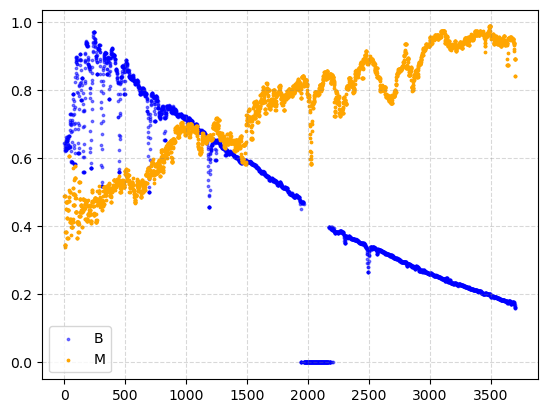

In [21]:
plt.scatter(array, X1,color = "blue",alpha= 0.5,s=3,label = "B")
plt.scatter(array, X2,color = "orange",s=3,label = "M")
plt.legend()
plt.grid(color="grey",alpha=0.3,linestyle="--")
plt.show()

#### 训练模型

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#导入数据集
X_A = X[y == "A"]  #100个
X_B = X[y == "B"]   #100个
X200 = np.concatenate((X_A,X_B),axis=0)
y200 = np.array(['A'] * 100 + ['B'] * 100)

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
#X_minmax = min_max_scaler.fit_transform(X200)
X200.shape
#X200 = pd.DataFrame(X_minmax, columns=y200)

# #拆分数据
# X_train, X_test, y_train, y_test = train_test_split(X200, y200, test_size=0.2, random_state= 12346789)
# lr = LogisticRegression(solver='liblinear')

# # 对lr模型进行训练(fit)
# lr.fit(X_train, y_train)
# print(lr.intercept_ )
# print(lr.coef_)

(200, 3700)

#### 调参

In [101]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'penalty': ('l1', 'l2'),
    'C': (0.01, 0.1, 1, 10),
}

lr = LogisticRegression(solver='liblinear')
lr_search = GridSearchCV(lr, parameters, scoring='accuracy', cv=5)
lr_search.fit(X_train, y_train)

#查看最佳结果
print(lr_search.best_estimator_)
print(lr_search.best_score_)
print(lr_search.best_params_)


LogisticRegression(C=10, penalty='l1', solver='liblinear')
0.95
{'C': 10, 'penalty': 'l1'}


In [102]:
lr = LogisticRegression(C=10,penalty='l1',solver='liblinear')
lr.fit(X_train, y_train)
print(lr.intercept_ )
print(lr.coef_)

[-3.05579839]
[[-1.38923127 -1.22507349  0.         ...  0.          0.
   0.        ]]


              precision    recall  f1-score   support

           A       1.00      1.00      1.00        18
           B       1.00      1.00      1.00        22

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[18  0]
 [ 0 22]]
1.0


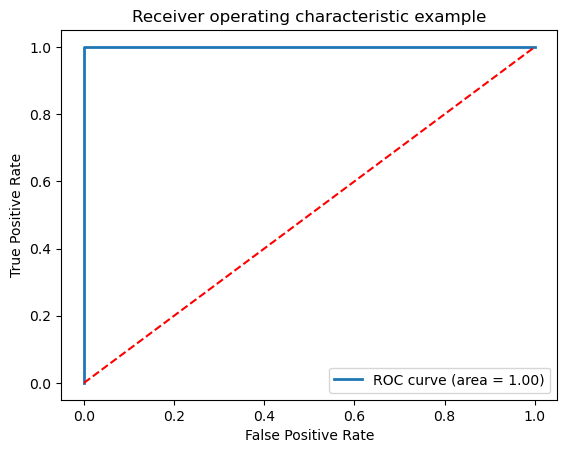

In [103]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# 利用模型对测试集进行预测，输出target预测标签值和概率
y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)

# 分类评估汇总报告classification_report
print(classification_report(y_test,y_test_pred))

# 误分类矩阵 confusion_matrix
print(confusion_matrix(y_test,y_test_pred))
                       
# ROC曲线
fpr, tpr, thresholds =roc_curve(y_test, y_test_prob[:,0],pos_label="A")

# print AUC值
auc = auc(fpr, tpr)
print(auc)

# plot ROC曲线
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0,1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

#### 导入测试集来验证模型训练结果

In [104]:
test_flux = np.load('./npy/fluxval.npy')
test_scl = np.load('./npy/sclsval.npy')

test_pred = lr.predict(test_flux)
test_prob = lr.predict_proba(test_flux)

# print(test_pred)
# print(test_scl)
# print(test_prob)
for x,y,z in zip(test_pred,test_scl,test_prob):
    print(f"预测值{x},真实值为{y}，预测概率为{z}")

预测值A,真实值为B，预测概率为[0.89977918 0.10022082]
预测值B,真实值为B，预测概率为[0.08489401 0.91510599]
预测值A,真实值为A，预测概率为[0.63501496 0.36498504]
预测值A,真实值为A，预测概率为[0.5921148 0.4078852]
预测值A,真实值为A，预测概率为[0.84146282 0.15853718]
预测值A,真实值为B，预测概率为[0.99779372 0.00220628]
预测值A,真实值为B，预测概率为[0.96438001 0.03561999]
预测值A,真实值为B，预测概率为[0.62627021 0.37372979]
预测值A,真实值为B，预测概率为[0.78826606 0.21173394]
预测值A,真实值为A，预测概率为[0.99641689 0.00358311]
预测值A,真实值为A，预测概率为[0.98632686 0.01367314]
预测值A,真实值为A，预测概率为[0.98485556 0.01514444]
预测值A,真实值为A，预测概率为[0.9473966 0.0526034]
预测值B,真实值为B，预测概率为[0.0077982 0.9922018]
预测值A,真实值为A，预测概率为[0.97789425 0.02210575]
预测值A,真实值为B，预测概率为[0.96755869 0.03244131]
预测值A,真实值为B，预测概率为[0.8254858 0.1745142]
预测值A,真实值为A，预测概率为[0.96521876 0.03478124]
预测值B,真实值为B，预测概率为[0.05671866 0.94328134]
预测值A,真实值为B，预测概率为[0.97530886 0.02469114]
预测值A,真实值为B，预测概率为[0.96695428 0.03304572]
预测值A,真实值为A，预测概率为[0.9885 0.0115]
预测值A,真实值为A，预测概率为[0.93813275 0.06186725]
预测值A,真实值为B，预测概率为[0.99071069 0.00928931]
预测值B,真实值为A，预测概率为[0.08225833 0.91774167]
预测值B,真实值为B，预测概率为

              precision    recall  f1-score   support

           A       0.56      0.94      0.70       100
           B       0.81      0.25      0.38       100

    accuracy                           0.59       200
   macro avg       0.68      0.59      0.54       200
weighted avg       0.68      0.59      0.54       200

[[94  6]
 [75 25]]
0.5598000000000001


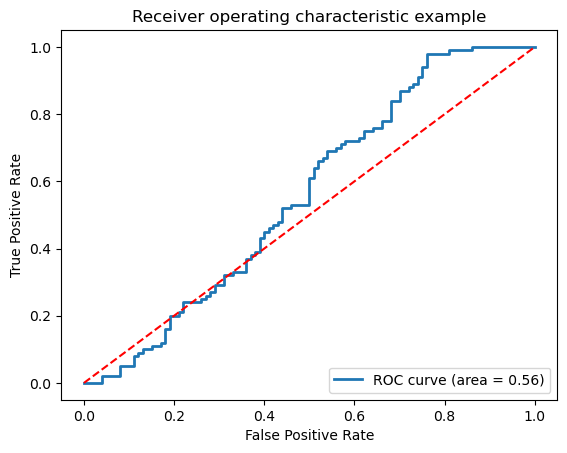

In [105]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

print(classification_report(test_scl,test_pred))
print(confusion_matrix(test_scl,test_pred))
                       
# ROC曲线
fpr, tpr, thresholds =roc_curve(test_scl, test_prob[:,0],pos_label="A")

# print AUC值
auc = auc(fpr, tpr)
print(auc)

# plot ROC曲线
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0,1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()